In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [63]:
sms=pd.read_csv('spam.csv',encoding='latin-1')
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [64]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [65]:
sms.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [66]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [67]:
sms.shape

(5572, 5)

In [68]:
sms.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [69]:
sms.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


<AxesSubplot:xlabel='v1', ylabel='count'>

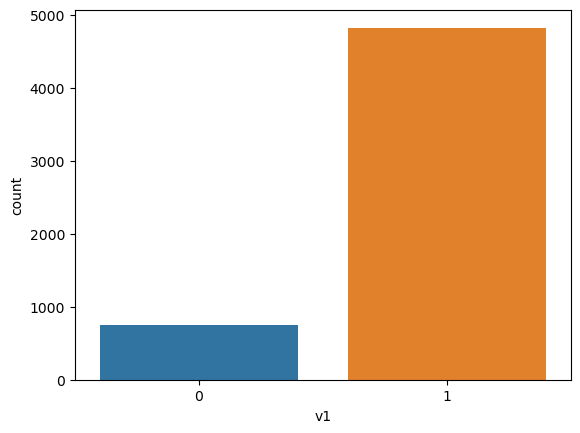

In [90]:
sns.countplot(x='v1',data=sms)

In [71]:
sms.loc[sms['v1']=='spam','v1',]=0
sms.loc[sms['v1']=='ham','v1',]=1
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,1,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,1,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,1,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,1,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,1,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [72]:
y=sms['v1']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

In [73]:
x=sms['v2']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [74]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
x.shape,X_train.shape,X_test.shape

((5572,), (4457,), (1115,))

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
tfidf=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train=tfidf.fit_transform(X_train).astype('int')
X_test=tfidf.transform(X_test).astype('int')
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [78]:
X_train.shape

(4457, 7472)

In [80]:
y_train.shape

(4457,)

In [83]:
naiv=MultinomialNB()

In [84]:
naiv.fit(X_train,y_train)
X_train_pred=naiv.predict(X_train)
score=accuracy_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

naiv.fit(X_test,y_test)
X_test_pred=naiv.predict(X_test)
score=accuracy_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.8660533991474085
accuracy score of test data: 0.8654708520179372


In [87]:
input_data=["Is that seriously how you spell his name?"]
input_data_features=tfidf.transform(input_data)
prediction=svm.predict(input_data_features)
prediction

array([1])

In [88]:
if(prediction[0]==0):
    print('spam SMS')
else:
    print('Ham SMS')

Ham SMS
